<a href="https://colab.research.google.com/github/VenkateshTK/NOMA/blob/master/NOMA___Prob_outage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non Orthogonal Multiple Access , channel capacity maximising.

In [56]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import pandas as pd 
import numpy as np
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt 
import math as m


In [57]:

dataset_dir='/content/dataset.csv'
writer = SummaryWriter('runs/Noma_trainloss')

class CustomDataset(Dataset):
  def __init__(self,csv_path):
        self.to_tensor = transforms.ToTensor()
        self.coloum_names = ["h1","h2","h3","h4","p1","p2","p3","p4","pt,""cost"]
        df=pd.read_csv(csv_path)    
        self.h = np.asarray(df.iloc[:,0:4])
        self.power = np.asarray(df.iloc[:,4:8])
        self.power_total = np.asarray(df.iloc[:,8])
        self.data_len=len(df.index)

  def __len__(self):
        return self.data_len

  def __getitem__(self, index):
        data1=self.h[index]
        data2=self.power_total[index]
        input_data = np.concatenate([data1,data2],axis = None)
        #print(input_data)
        output_data = self.power[index]
        return torch.from_numpy(input_data),torch.from_numpy(output_data)

dataset=CustomDataset(dataset_dir)
print(dataset.__getitem__(0))

#print(dataframe.head())new_a = a[np.newaxis, :]
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset,[train_size, test_size])

(tensor([ 0.2891, 11.8935, 13.4525, 45.9215, 14.1200], dtype=torch.float64), tensor([2.7072, 1.2744, 1.3488, 8.7896], dtype=torch.float64))


In [58]:

input_size = 5
output_size= 4
hidden_size = 30
num_classes = 4
num_epochs = 100
batch_size = 1
learning_rate = 0.001


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=10,shuffle=True)


# Fully connected neural network with one hidden layer
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden_1 = torch.nn.Linear(n_feature, n_hidden)
        self.hidden_2 = torch.nn.Linear(n_hidden, 50)    # hidden layer
        self.hidden_3 = torch.nn.Linear(50, n_hidden)    # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden_1(x))
        x = F.relu(self.hidden_2(x))
        x = F.relu(self.hidden_3(x))
        x = F.relu(self.predict(x))      # activation function for hidden layer
        return x


model = Net(input_size, hidden_size, num_classes)

print(model)


Net(
  (hidden_1): Linear(in_features=5, out_features=30, bias=True)
  (hidden_2): Linear(in_features=30, out_features=50, bias=True)
  (hidden_3): Linear(in_features=50, out_features=30, bias=True)
  (predict): Linear(in_features=30, out_features=4, bias=True)
)


In [59]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)  

In [68]:

total_step = len(train_loader)
running_loss=0.0
loss1=[]
for epoch in range(num_epochs):
    for i, (data,labels) in enumerate(train_loader):        
        # Forward pass
        labels=labels[:,np.newaxis]
        outputs = model(data.float())
        loss = criterion(outputs, labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        if (i+1) % batch_size == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    writer.add_scalar('training loss',running_loss/total_step,epoch)
    loss1.append(running_loss/total_step)
    running_loss=0
torch.save(model.state_dict(), 'model.ckpt')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1, 1, 4])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Streaming output truncated to the last 5000 lines.
Epoch [90/100], Step [425/493], Loss: 0.0045
Epoch [90/100], Step [426/493], Loss: 0.0095
Epoch [90/100], Step [427/493], Loss: 0.0084
Epoch [90/100], Step [428/493], Loss: 0.0393
Epoch [90/100], Step [429/493], Loss: 0.0191
Epoch [90/100], Step [430/493], Loss: 0.0081
Epoch [90/100], Step [431/493], Loss: 0.0597
Epoch [90/100], Step [432/493], Loss: 0.0097
Epoch [90/100], Step [433/493], Loss: 0.0077
Epoch [90/100], Step [434/493], Loss: 0.0035
Epoch [90/100], Step [435/493], Loss: 0.1971
Epoch [90/100], Step [436/493], Loss: 0.0145
Epoch [90/100], Step [437/493], Loss: 0.0096
Epoch [90/100], Step [438/493], Loss: 0.0081
Epoch [90/100], Step [439/493], Loss: 0.0017
Epoch [90/100], Step [440/493], Loss: 0.0770
Epoch [90/100], Step [441/493], Loss: 0.0280
Epoch [90/100], Step [442/493], Loss: 0.0023
Epoch [90/100], Step [443/493], Loss: 0.0060
Epoch [90/100], Step [444/493], Loss: 0.1160
Epoch [90/100], Step [445/493], Loss: 0.0055
Epoc

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([10, 1, 4])) that is different to the input size (torch.Size([10, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([4, 1, 4])) that is different to the input size (torch.Size([4, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


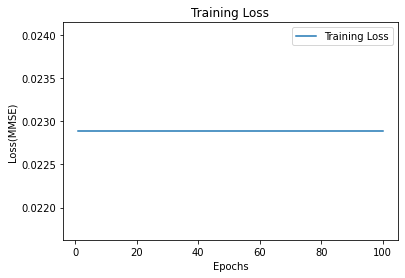

In [69]:
model = Net(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load('model.ckpt'))
model.eval()

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    for (data,labels) in test_loader:
        #data=transforms.ToTensor(data)
        labels=labels[:,np.newaxis]
        outputs = model(data.float())
        loss = criterion(outputs,labels.float())

My_list = list(range(1, num_epochs+1))
plt.plot(My_list,loss1,label = "Training Loss")
plt.xlabel('Epochs') 
plt.ylabel('Loss(MMSE)') 
plt.title('Training Loss') 
plt.legend() 
plt.show()


### Probability of Outage Calculation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  from ipykernel import kernelapp as app


[[0.229 0.001 0.938 0.799]
 [0.152 0.    0.924 0.68 ]
 [0.125 0.    0.921 0.638]
 [0.091 0.    0.894 0.489]
 [0.06  0.    0.884 0.422]
 [0.028 0.    0.898 0.284]
 [0.023 0.    0.88  0.288]
 [0.025 0.    0.877 0.272]
 [0.016 0.    0.88  0.252]
 [0.014 0.    0.896 0.246]
 [0.014 0.    0.888 0.219]
 [0.02  0.    0.877 0.222]
 [0.011 0.    0.895 0.207]
 [0.017 0.    0.879 0.182]
 [0.012 0.    0.879 0.194]
 [0.014 0.    0.887 0.169]
 [0.007 0.    0.884 0.155]
 [0.01  0.    0.897 0.178]]


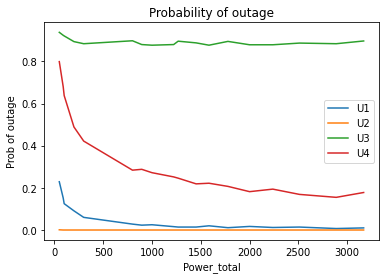

In [70]:
model = Net(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load('model.ckpt'))
model.eval()
trials=1000

thresh=1
scale=1
power_total=[50,90,100,200,300,800,895,1000,1222,1268,1452,1584,1778,2000,2238,2511,2888,3169];
            #[800,895,100,122,126,145,158,177,200,223,251,288,316,410];
prob_outage=np.zeros([len(power_total),4])
for i in range(len(power_total)):
    p=np.zeros([1,4]);
    no_outages=np.zeros([1,4])
    for j in range(trials):
        hr = [abs(np.asscalar(1*np.random.normal(0,1,1))),np.asscalar(abs(2*np.random.normal(0,1,1))),np.asscalar(abs(3*np.random.normal(0,1,1))),np.asscalar(abs(4*np.random.normal(0,1,1)))]
        hr.sort()
        h=[hr[1],hr[3],hr[2],hr[0]]
        input=hr+[power_total[i]]
        input = torch.from_numpy(np.array(input)).float()
        p=model(input)
        c1 = m.log2(1+((h[0]**2)*p[0]/((h[0]**2)*p[1]+(h[0]**2)*p[2]+1)))
        c2 = m.log2(1+(h[1]**2)*p[1])
        c3 = m.log2(1+((h[2]**2)*p[2]/((h[1]**2)*p[1]+1)))
        c4 = m.log2(1+((h[3]**2)*p[3]/((h[3]**2)*p[0]+(h[3]**2)*p[1]+(h[3]**2)*p[2]+1)))
        
        if c1<thresh:
          no_outages[0][0]+=1
        if c2<thresh:
          no_outages[0][1]+=1
        if c3<thresh:
          no_outages[0][2]+=1
        if c4<thresh:
          no_outages[0][3]+=1
        
    for j in range(4):
      prob_outage[i][j]=no_outages[0][j]/trials


plt.plot(power_total,prob_outage[:,0],label = "U1")
plt.plot(power_total,prob_outage[:,1],label = "U2") 
plt.plot(power_total,prob_outage[:,2],label = "U3")
plt.plot(power_total,prob_outage[:,3],label = "U4")
plt.xlabel('Power_total') 
plt.ylabel('Prob of outage') 
plt.title('Probability of outage') 
plt.legend() 
plt.show()

        
